# Week 5 Use Case: Estimate the Probability of Graduate School Admission

#Objective:  Build a machine learning model to help students estimate the probability of being admitted to the graduate school of a university given information about the university rating, the student’s GPA, and different scores, e.g. GRE and TOEFL scores.

In [2]:
#Hide Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Import the data
df = pd.read_csv('week5.csv\week5.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


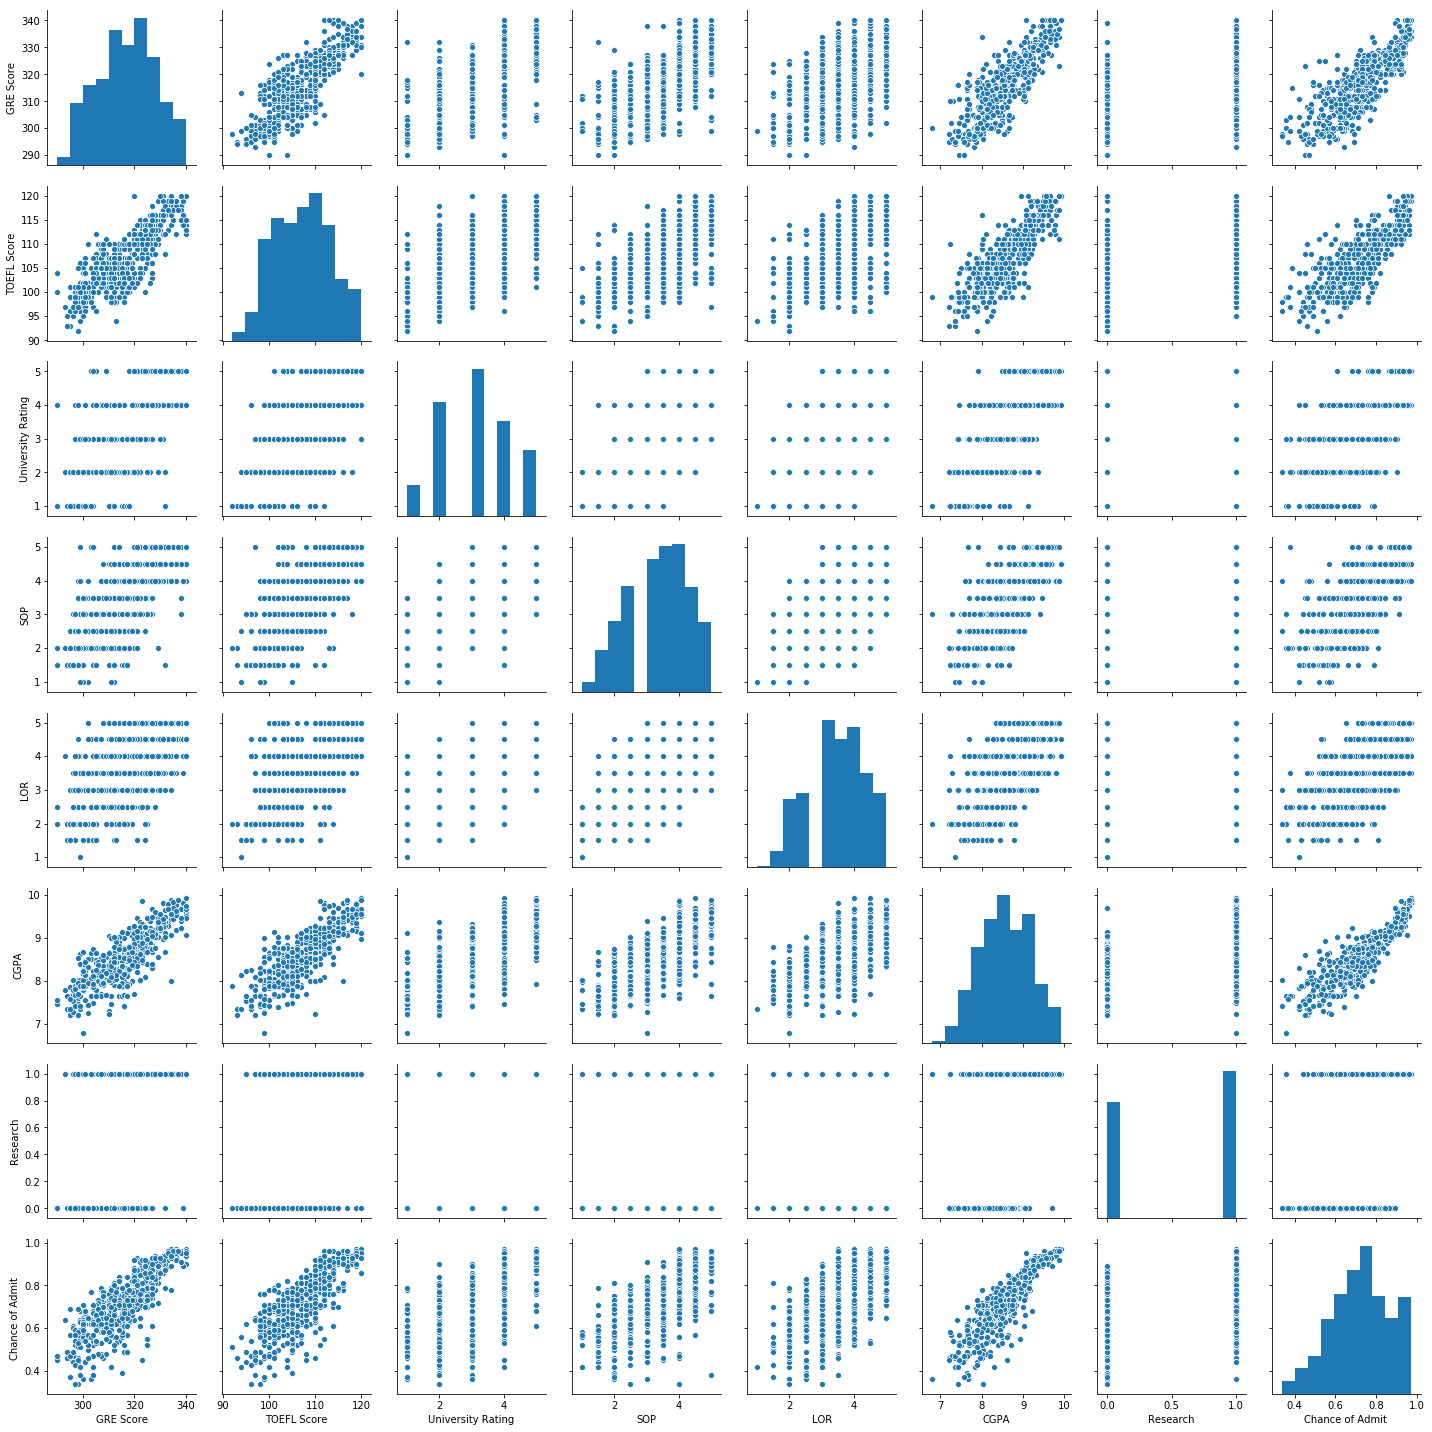

In [6]:
#Visualize with pair plot
df = df.drop('Serial No.', axis = 1)
sns.pairplot(df)

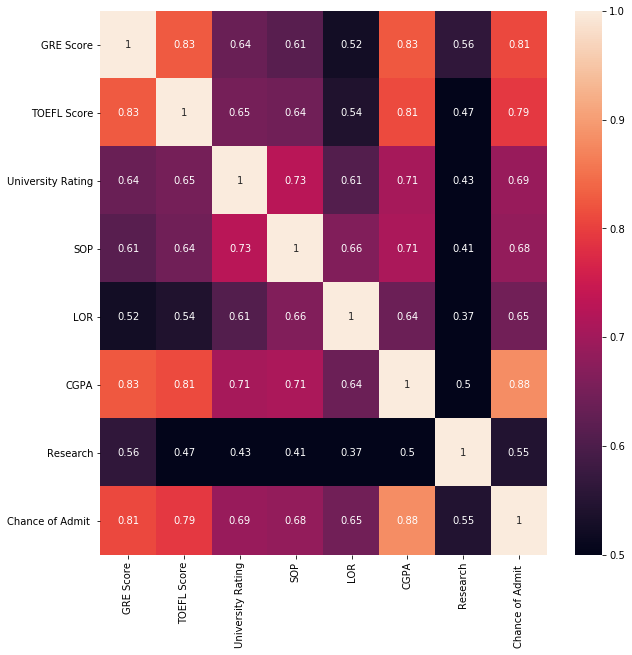

In [7]:
#Check Research on Heatmap.  Appears to have a +/- 50% correlation with Chance of Admission
#Run the model with all features, but investigate dropping Research and other features to improve the accuracy of models
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, vmin = 0.5, vmax = 1)

In [8]:
#Chance of admission is continuous between 0 and 1.

#This is a Supervised Learning example since we have data on chance of admission.

#The data is generally linear in nature.
    
#Split into X and y and drop Serial No. from the X set

x_columns = 7
X = df.iloc[:,0:x_columns]
y = df.iloc[:,x_columns]

In [9]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [10]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [11]:
#Split X into train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Create a train / test set for polynominal linear regressor
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X)
XP_train, XP_test, yp_train, yp_test = train_test_split(X_poly, y, test_size=0.25, random_state = 0)

In [14]:
#Import models to train & test on the dataset: 
#Linear Regressor, Poly-Linear Regressor, SVR Linear, KNN, Random Forest, Decision Tree

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score

In [15]:
#Optimize KNN Neighbors
max_score = 0
n = 0
for i in range (1,100):
    _model = KNeighborsRegressor(n_neighbors = i)
    _model.fit(X_train, y_train)       
    _y_pred = _model.predict(X_test)
    _score = r2_score(y_test, _y_pred)
    if _score > max_score:
        max_score = _score
        n = i
        
print('Optimal Neighbors is: ', n,', Best score is: ', max_score)

Optimal Neighbors is:  31 , Best score is:  0.7712114920191778


In [16]:
#Optimize Random Forest n_estimators
max_score = 0
n = 0
for i in [5, 10, 25, 50, 100, 200, 300, 400, 450]:
    _model = RandomForestRegressor(n_estimators = i, random_state = 0)
    _model.fit(X_train, y_train)       
    _y_pred = _model.predict(X_test)
    _score = r2_score(y_test, _y_pred)
    print('n_est: ', i, 'gives score: ', _score)
    if _score > max_score:
        max_score = _score
        n = i
        
print('Optimal Neighbors is: ', n,', Best score is: ', max_score)

n_est:  5 gives score:  0.7867013373965854
n_est:  10 gives score:  0.7843697545752327
n_est:  25 gives score:  0.7860742629923569
n_est:  50 gives score:  0.7914558481223757
n_est:  100 gives score:  0.7957494320002827
n_est:  200 gives score:  0.7975070471602734
n_est:  300 gives score:  0.8004612347643141
n_est:  400 gives score:  0.8007237447499067
n_est:  450 gives score:  0.800387450558167
Optimal Neighbors is:  400 , Best score is:  0.8007237447499067


In [17]:
#Set up List to store models
models=[("LR", LinearRegression()), ("PLR", LinearRegression()), ("SVR", SVR(kernel = 'linear')), ("KNR", KNeighborsRegressor(n_neighbors = 31)),
        ("DTR", DecisionTreeRegressor()), ("RFR", RandomForestRegressor(n_estimators = 400, random_state = 0))]

In [18]:
#Loop to run all models
results = []

for name, regressor in models:    
    if name == "PLR":
        n = 0
        _model = regressor
        _model.fit(XP_train, yp_train)       
        _y_pred = _model.predict(XP_test)
        _score = r2_score(yp_test, _y_pred)
    else:
        n = 0
        _model = regressor
        _model.fit(X_train, y_train)       
        _y_pred = _model.predict(X_test)
        _score = r2_score(y_test, _y_pred)
        
    model_info = [name, _model, _y_pred, _score, n]
    results.append(model_info)

In [19]:
print('Model results for all 7 features')
print('model','  score')
for model_info in results:    
    print(model_info[0],model_info[3])

Model results for all 7 features
model   score
LR 0.7973334616338151
PLR 0.7971752560095418
SVR 0.7603338779377147
KNR 0.7712114920191778
DTR 0.6080360586455464
RFR 0.8007237447499067


Text(0, 0.5, 'Prediction')

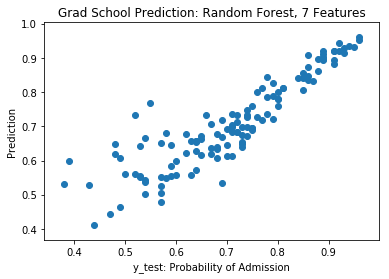

In [41]:
#Plot Random Forest on Scatter plot
plt.scatter(y_test, results[5][2])
plt.title('Grad School Prediction: Random Forest, 7 Features')
plt.xlabel('y_test: Probability of Admission')
plt.ylabel('Prediction')

In [21]:
#Reduce Features and re-run, assume n_neighbors and n_estimators remain the same
#Drop Research & split data, and scale
X = X.drop('Research', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [23]:
#Fit for Polynomial Linear Regressor
X_poly = poly.fit_transform(X)
XP_train, XP_test, yp_train, yp_test = train_test_split(X_poly, y, test_size=0.25, random_state = 0)

In [24]:
#Check if KNN can be optimized on n_neighbors
# while the other models have decreased.
max_score = 0
n = 0
for i in range (1,100):
    _model = KNeighborsRegressor(n_neighbors = i)
    _model.fit(X_train, y_train)       
    _y_pred = _model.predict(X_test)
    _score = r2_score(y_test, _y_pred)
    if _score > max_score:
        max_score = _score
        n = i
        
print('Optimal Neighbors is: ', n,', Best score is: ', max_score)

Optimal Neighbors is:  27 , Best score is:  0.7899722129059644


In [25]:
#Optimize Random Forest n_estimators
max_score = 0
n = 0
for i in [5, 10, 25, 50, 100, 200, 300, 400, 450]:
    _model = RandomForestRegressor(n_estimators = i, random_state = 0)
    _model.fit(X_train, y_train)       
    _y_pred = _model.predict(X_test)
    _score = r2_score(y_test, _y_pred)
    print('n_est: ', i, 'gives score: ', _score)
    if _score > max_score:
        max_score = _score
        n = i
        
print('Optimal Neighbors is: ', n,', Best score is: ', max_score)

n_est:  5 gives score:  0.7740749718885974
n_est:  10 gives score:  0.7714700837638317
n_est:  25 gives score:  0.7789671028687212
n_est:  50 gives score:  0.7840997594913333
n_est:  100 gives score:  0.7894744186236009
n_est:  200 gives score:  0.7902430972162243
n_est:  300 gives score:  0.7933855231406791
n_est:  400 gives score:  0.794088042109981
n_est:  450 gives score:  0.7930914224493792
Optimal Neighbors is:  400 , Best score is:  0.794088042109981


In [26]:
#Re-Set models for KNN change in n_neighbors with one less feature
models=[("LR", LinearRegression()), ("PLR", LinearRegression()), ("SVR", SVR(kernel = 'linear')), ("KNR", KNeighborsRegressor(n_neighbors = 27)),
        ("DTR", DecisionTreeRegressor()), ("RFR", RandomForestRegressor(n_estimators = 400, random_state = 0))]

In [27]:
#Loop to run all models, use results_6_features
results_6_features = []

for name, regressor in models:    
    if name == "PLR":
        n = 0
        _model = regressor
        _model.fit(XP_train, yp_train)       
        _y_pred = _model.predict(XP_test)
        _score = r2_score(yp_test, _y_pred)
    else:
        n = 0
        _model = regressor
        _model.fit(X_train, y_train)       
        _y_pred = _model.predict(X_test)
        _score = r2_score(y_test, _y_pred)
        
    model_info = [name, _model, _y_pred, _score, n]
    results_6_features.append(model_info)

In [28]:
print('Model results for 6 features: All except Research')
print('model','  score')
for model_info in results_6_features:    
    print(model_info[0],model_info[3])

Model results for 6 features: All except Research
model   score
LR 0.7920545748821533
PLR 0.7941553955875922
SVR 0.7634805000575816
KNR 0.7899722129059644
DTR 0.5851191543220943
RFR 0.794088042109981


In [29]:
#Reduce Features to three highest correlated feature:CGPA, GRE score and TOEFL score. 
#re-run, assume n_neighbors and n_estimators remain the same
#Drop features & split data, and scale
X = X.drop(['University Rating','SOP','LOR'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X.head()

,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21


In [30]:
#Fit for Polynomial Linear Regressor
X_poly = poly.fit_transform(X)
XP_train, XP_test, yp_train, yp_test = train_test_split(X_poly, y, test_size=0.25, random_state = 0)

In [31]:
#Check if KNN can be optimized on n_neighbors
# while the other models have decreased.
max_score = 0
n = 0
for i in range (1,100):
    _model = KNeighborsRegressor(n_neighbors = i)
    _model.fit(X_train, y_train)       
    _y_pred = _model.predict(X_test)
    _score = r2_score(y_test, _y_pred)
    if _score > max_score:
        max_score = _score
        n = i
        
print('Optimal Neighbors is: ', n,', Best score is: ', max_score)

Optimal Neighbors is:  7 , Best score is:  0.7942138208215836


In [32]:
#Optimize Random Forest n_estimators
max_score = 0
n = 0
for i in [5, 10, 25, 50, 100, 200, 300, 400, 450]:
    _model = RandomForestRegressor(n_estimators = i, random_state = 0)
    _model.fit(X_train, y_train)       
    _y_pred = _model.predict(X_test)
    _score = r2_score(y_test, _y_pred)
    print('n_est: ', i, 'gives score: ', _score)
    if _score > max_score:
        max_score = _score
        n = i
        
print('Optimal Neighbors is: ', n,', Best score is: ', max_score)

n_est:  5 gives score:  0.7225893491433191
n_est:  10 gives score:  0.7451078904316981
n_est:  25 gives score:  0.7677961896294333
n_est:  50 gives score:  0.7754821672037796
n_est:  100 gives score:  0.7789109062743081
n_est:  200 gives score:  0.7851541489969901
n_est:  300 gives score:  0.7864816457100976
n_est:  400 gives score:  0.7858963648367882
n_est:  450 gives score:  0.7863207882448922
Optimal Neighbors is:  300 , Best score is:  0.7864816457100976


In [33]:
#Re-Set models for KNN change in n_neighbors and RFR change in n_estimators with only three feature
models=[("LR", LinearRegression()), ("PLR", LinearRegression()), ("SVR", SVR(kernel = 'linear')), ("KNR", KNeighborsRegressor(n_neighbors = 7)),
        ("DTR", DecisionTreeRegressor()), ("RFR", RandomForestRegressor(n_estimators = 300, random_state = 0))]

In [34]:
#Loop to run all models, use results_3_features
results_3_features = []

for name, regressor in models:    
    if name == "PLR":
        n = 0
        _model = regressor
        _model.fit(XP_train, yp_train)       
        _y_pred = _model.predict(XP_test)
        _score = r2_score(yp_test, _y_pred)
    else:
        n = 0
        _model = regressor
        _model.fit(X_train, y_train)       
        _y_pred = _model.predict(X_test)
        _score = r2_score(y_test, _y_pred)
        
    model_info = [name, _model, _y_pred, _score, n]
    results_3_features.append(model_info)

In [35]:
print('Model results for 3 features: CGPA, GRE score, and TOEFL score ')
print('model','  score')
for model_info in results_3_features:    
    print(model_info[0],model_info[3])

Model results for 3 features: CGPA, GRE score, and TOEFL score 
model   score
LR 0.7859547186225324
PLR 0.7840528617183002
SVR 0.7710442288819359
KNR 0.7942138208215836
DTR 0.5691197600073878
RFR 0.7864816457100976


In [36]:
#KNR improves with fewer features.  Try an analysis with just two features: CGPA and GRE score
#Drop TOEFL from X, resplit, scale, then optimize on n_neighbors
X =  X.drop(['TOEFL Score'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#Optimize k_neighbors for 2 features
max_score = 0
n = 0
for i in range (1,100):
    _model = KNeighborsRegressor(n_neighbors = i)
    _model.fit(X_train, y_train)       
    _y_pred = _model.predict(X_test)
    _score = r2_score(y_test, _y_pred)
    if _score > max_score:
        max_score = _score
        n = i
        KNR_2Features_model = _model
        
print('Optimal Neighbors is: ', n,', Best score is: ', max_score)

Optimal Neighbors is:  16 , Best score is:  0.7936689516093439


#KNR performance declined slightly from training with the 3 highest correlated features when trained with the 2 highest correlated features

# Observations
#The highest score was 0.80 using Random Forest Regressor and all 7 features.  Random Forest, Linear Regression, and Polynomial Linear Regression scores declined slightly as the number of features was reduced.  Decision Tree declined more significantly.

#SVR and KNeighbors Regressor improved slightly with fewer features, from 7 to 6 to 3 features.

In [39]:
#Refit and scale X to get scale transform for student scores below from 7 feature dataset
x_columns = 7
X = df.iloc[:,0:x_columns]
X_train, X_test = train_test_split(X, test_size = 0.25, random_state = 0)
X_train = scaler.fit_transform(X_train)

In [40]:
#Run the RFR model on sample student data of GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
s_min = [[290, 92, 1, 1, 1, 6.8, 0]]
s_max = [[340, 120, 5, 5, 5, 9.92, 1]]
s_avg = [[316, 107, 3, 3.5, 3.5, 8.57, 1]]
s_1 = [[311, 104, 3, 3.5, 2, 8.2, 1]]
s_2 = [[302, 100, 1, 2, 1.5, 9.0, 0]]
students = [('student_min',s_min), ('student_max',s_max), ('student_avg',s_avg), ('student_1',s_1), ('student_2',s_2)]

model = results[5][1]  #RFR model saved in results
for student, scores in students:
    transform_scores = scaler.transform(scores)
    print(student, ' has likelihood of acceptance into Grad School of: ',int(100*(model.predict(transform_scores))), '%')

student_min  has likelihood of acceptance into Grad School of:  43 %
student_max  has likelihood of acceptance into Grad School of:  96 %
student_avg  has likelihood of acceptance into Grad School of:  69 %
student_1  has likelihood of acceptance into Grad School of:  61 %
student_2  has likelihood of acceptance into Grad School of:  68 %
